# English Wikipedia Page Views

In [1]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

##### Question 1: Pageviews for an article of your choice on English Wikipedia, plotted daily, for the calendar year 2020

In [124]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
example_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "all-access",
                    "agent" : "user",
                    "article" : "Diwali",
                    "granularity" : "daily",
                    "start" : "2020010100", #YYYYMMDDHH
                    "end" :   '2020123100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/nvgopal',
    'From': 'nvgopal@ucsd.com'
}

In [125]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [126]:
example_monthly_pageviews = api_call(endpoint_pageviews, example_params_pageviews)
example_monthly_pageviews

{'items': [{'project': 'en.wikipedia',
   'access': 'all-access',
   'agent': 'user',
   'granularity': 'daily',
   'timestamp': '2020010100',
   'views': 251269426},
  {'project': 'en.wikipedia',
   'access': 'all-access',
   'agent': 'user',
   'granularity': 'daily',
   'timestamp': '2020010200',
   'views': 268920258},
  {'project': 'en.wikipedia',
   'access': 'all-access',
   'agent': 'user',
   'granularity': 'daily',
   'timestamp': '2020010300',
   'views': 264139157},
  {'project': 'en.wikipedia',
   'access': 'all-access',
   'agent': 'user',
   'granularity': 'daily',
   'timestamp': '2020010400',
   'views': 263223806},
  {'project': 'en.wikipedia',
   'access': 'all-access',
   'agent': 'user',
   'granularity': 'daily',
   'timestamp': '2020010500',
   'views': 281644795},
  {'project': 'en.wikipedia',
   'access': 'all-access',
   'agent': 'user',
   'granularity': 'daily',
   'timestamp': '2020010600',
   'views': 288258779},
  {'project': 'en.wikipedia',
   'access': 

In [127]:
example_monthly_pageviews['items'][0:5]

[{'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2020010100',
  'views': 251269426},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2020010200',
  'views': 268920258},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2020010300',
  'views': 264139157},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2020010400',
  'views': 263223806},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2020010500',
  'views': 281644795}]

In [128]:
df = pd.DataFrame(example_monthly_pageviews['items'])
df

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,all-access,user,daily,2020010100,251269426
1,en.wikipedia,all-access,user,daily,2020010200,268920258
2,en.wikipedia,all-access,user,daily,2020010300,264139157
3,en.wikipedia,all-access,user,daily,2020010400,263223806
4,en.wikipedia,all-access,user,daily,2020010500,281644795
...,...,...,...,...,...,...
361,en.wikipedia,all-access,user,daily,2020122700,269342217
362,en.wikipedia,all-access,user,daily,2020122800,262443381
363,en.wikipedia,all-access,user,daily,2020122900,255777479
364,en.wikipedia,all-access,user,daily,2020123000,250463902


In [129]:
df = df[['timestamp','views']]

In [130]:
pd.to_datetime(df['timestamp'], format="%Y%m%d00")

0     2020-01-01
1     2020-01-02
2     2020-01-03
3     2020-01-04
4     2020-01-05
         ...    
361   2020-12-27
362   2020-12-28
363   2020-12-29
364   2020-12-30
365   2020-12-31
Name: timestamp, Length: 366, dtype: datetime64[ns]

In [131]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y%m%d00").copy()
df = df.set_index('timestamp')
df

/tmp/ipykernel_75/3663965738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y%m%d00").copy()


,views
timestamp,
2020-01-01,251269426
2020-01-02,268920258
2020-01-03,264139157
2020-01-04,263223806
2020-01-05,281644795
...,...
2020-12-27,269342217
2020-12-28,262443381
2020-12-29,255777479


##### PLOT FOR PAGEVIEWS FOR DIWALI YEAR 2020

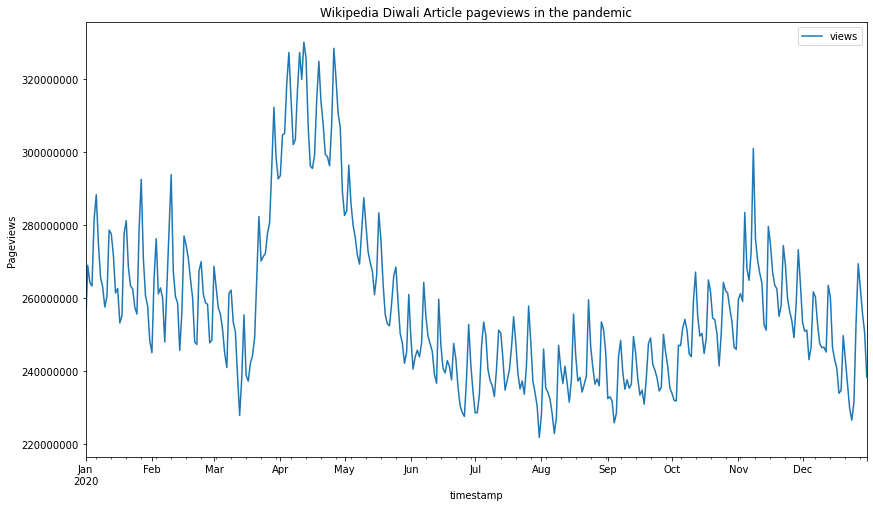

In [132]:
fig = df.plot(figsize=(14,8))
fig.set_ylabel("Pageviews")
fig.set_title("Wikipedia Diwali Article pageviews in the pandemic")

fig.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.savefig("pageviews.pdf", dpi=300)

##### Question 2: All pageviews to English Wikipedia, plotted monthly, for 2017-2020

*Question 2a: For mobile-web devices only*

In [153]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
mobile_web_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "daily",
                    "start" : "2017010100", #YYYYMMDDHH
                    "end" :   '2020123100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/nvgopal',
    'From': 'nvgopal@ucsd.com'
}

In [154]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [155]:
mobile_web_params_pageviews = api_call(endpoint_pageviews, mobile_web_params_pageviews)

In [156]:
mobile_web_params_pageviews['items'][0:5]

[{'project': 'en.wikipedia',
  'access': 'mobile-web',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2017010100',
  'views': 142433697},
 {'project': 'en.wikipedia',
  'access': 'mobile-web',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2017010200',
  'views': 147270810},
 {'project': 'en.wikipedia',
  'access': 'mobile-web',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2017010300',
  'views': 129596119},
 {'project': 'en.wikipedia',
  'access': 'mobile-web',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2017010400',
  'views': 122673968},
 {'project': 'en.wikipedia',
  'access': 'mobile-web',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2017010500',
  'views': 120367854}]

In [157]:
df = pd.DataFrame(mobile_web_params_pageviews['items'])
df

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,mobile-web,user,daily,2017010100,142433697
1,en.wikipedia,mobile-web,user,daily,2017010200,147270810
2,en.wikipedia,mobile-web,user,daily,2017010300,129596119
3,en.wikipedia,mobile-web,user,daily,2017010400,122673968
4,en.wikipedia,mobile-web,user,daily,2017010500,120367854
...,...,...,...,...,...,...
1456,en.wikipedia,mobile-web,user,daily,2020122700,181113950
1457,en.wikipedia,mobile-web,user,daily,2020122800,166111529
1458,en.wikipedia,mobile-web,user,daily,2020122900,158902458
1459,en.wikipedia,mobile-web,user,daily,2020123000,155410936


In [158]:
df = df[['timestamp','views']]
df

,timestamp,views
0,2017010100,142433697
1,2017010200,147270810
2,2017010300,129596119
3,2017010400,122673968
4,2017010500,120367854
...,...,...
1456,2020122700,181113950
1457,2020122800,166111529
1458,2020122900,158902458
1459,2020123000,155410936


In [159]:
pd.to_datetime(df['timestamp'], format="%Y%m%d00")

0      2017-01-01
1      2017-01-02
2      2017-01-03
3      2017-01-04
4      2017-01-05
          ...    
1456   2020-12-27
1457   2020-12-28
1458   2020-12-29
1459   2020-12-30
1460   2020-12-31
Name: timestamp, Length: 1461, dtype: datetime64[ns]

In [160]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y%m%d00").copy()
df = df.set_index('timestamp')
df

/tmp/ipykernel_75/1784556164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y%m%d00").copy()


,views
timestamp,
2017-01-01,142433697
2017-01-02,147270810
2017-01-03,129596119
2017-01-04,122673968
2017-01-05,120367854
...,...
2020-12-27,181113950
2020-12-28,166111529
2020-12-29,158902458


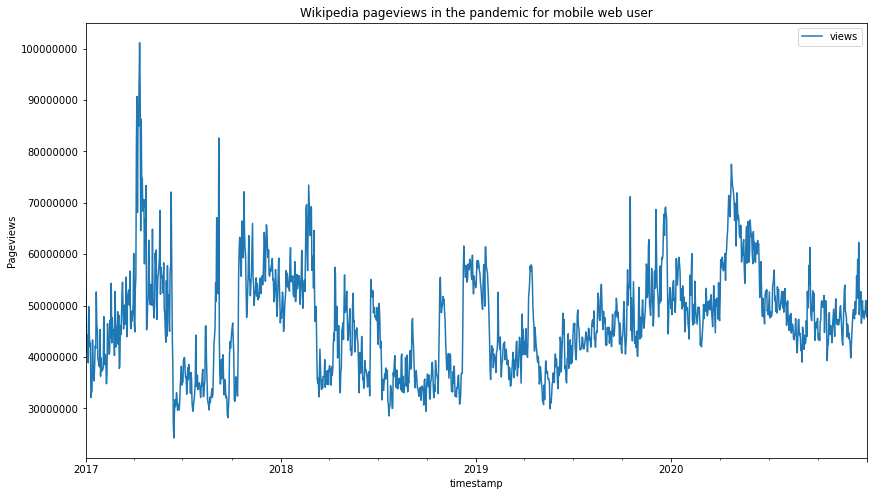

In [185]:
fig = df.plot(figsize=(14,8))
fig.set_ylabel("Pageviews")
fig.set_title("Wikipedia pageviews in the pandemic for mobile web user")

fig.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.savefig("pageviews.pdf", dpi=300)

*Question 2b: For desktop devices only*

In [151]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
desktop_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "daily",
                    "start" : "2017010100", #YYYYMMDDHH
                    "end" :   '2020123100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/nvgopal',
    'From': 'nvgopal@ucsd.com'
}

In [152]:
desktop_params_pageviews = api_call(endpoint_pageviews, example_params_pageviews)

In [162]:
desktop_params_pageviews['items'][0:5]

[{'project': 'en.wikipedia',
  'access': 'mobile-web',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2017010100',
  'views': 142433697},
 {'project': 'en.wikipedia',
  'access': 'mobile-web',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2017010200',
  'views': 147270810},
 {'project': 'en.wikipedia',
  'access': 'mobile-web',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2017010300',
  'views': 129596119},
 {'project': 'en.wikipedia',
  'access': 'mobile-web',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2017010400',
  'views': 122673968},
 {'project': 'en.wikipedia',
  'access': 'mobile-web',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2017010500',
  'views': 120367854}]

In [163]:
df = pd.DataFrame(mobile_web_params_pageviews['items'])
df

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,mobile-web,user,daily,2017010100,142433697
1,en.wikipedia,mobile-web,user,daily,2017010200,147270810
2,en.wikipedia,mobile-web,user,daily,2017010300,129596119
3,en.wikipedia,mobile-web,user,daily,2017010400,122673968
4,en.wikipedia,mobile-web,user,daily,2017010500,120367854
...,...,...,...,...,...,...
1456,en.wikipedia,mobile-web,user,daily,2020122700,181113950
1457,en.wikipedia,mobile-web,user,daily,2020122800,166111529
1458,en.wikipedia,mobile-web,user,daily,2020122900,158902458
1459,en.wikipedia,mobile-web,user,daily,2020123000,155410936


In [164]:
df = df[['timestamp','views']]
df

,timestamp,views
0,2017010100,142433697
1,2017010200,147270810
2,2017010300,129596119
3,2017010400,122673968
4,2017010500,120367854
...,...,...
1456,2020122700,181113950
1457,2020122800,166111529
1458,2020122900,158902458
1459,2020123000,155410936


In [165]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y%m%d00").copy()
df = df.set_index('timestamp')
df

/tmp/ipykernel_75/1784556164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y%m%d00").copy()


,views
timestamp,
2017-01-01,142433697
2017-01-02,147270810
2017-01-03,129596119
2017-01-04,122673968
2017-01-05,120367854
...,...
2020-12-27,181113950
2020-12-28,166111529
2020-12-29,158902458


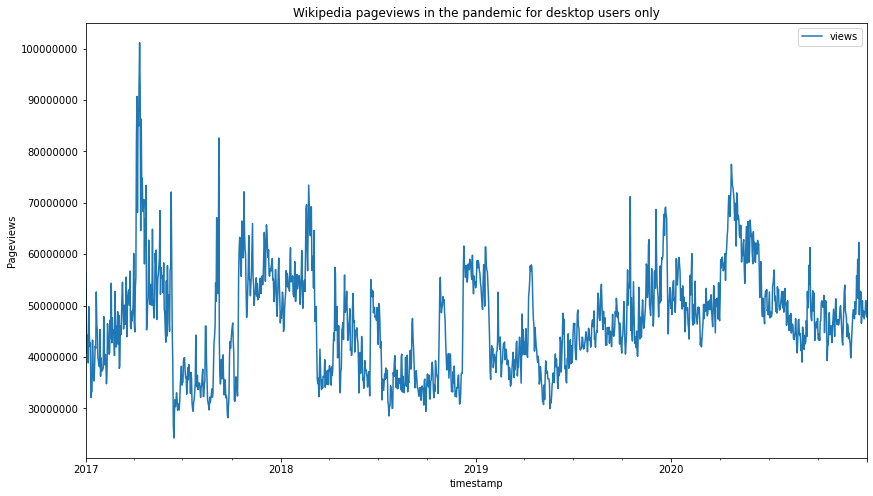

In [186]:
fig = df.plot(figsize=(14,8))
fig.set_ylabel("Pageviews")
fig.set_title("Wikipedia pageviews in the pandemic for desktop users only")

fig.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.savefig("pageviews.pdf", dpi=300)

*Question 2c: For web spiders only*

In [177]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
web_spiders_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "all-access",
                    "agent" : "spider",
                    "granularity" : "daily",
                    "start" : "2017010100", #YYYYMMDDHH
                    "end" :   '2020123100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/nvgopal',
    'From': 'nvgopal@ucsd.com'
}

In [178]:
web_spiders_params_pageviews = api_call(endpoint_pageviews, web_spiders_params_pageviews)

In [179]:
web_spiders_params_pageviews['items'][0:5]

[{'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'spider',
  'granularity': 'daily',
  'timestamp': '2017010100',
  'views': 56700159},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'spider',
  'granularity': 'daily',
  'timestamp': '2017010200',
  'views': 52729960},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'spider',
  'granularity': 'daily',
  'timestamp': '2017010300',
  'views': 41431248},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'spider',
  'granularity': 'daily',
  'timestamp': '2017010400',
  'views': 40723785},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'spider',
  'granularity': 'daily',
  'timestamp': '2017010500',
  'views': 44238922}]

In [180]:
df = pd.DataFrame(web_spiders_params_pageviews['items'])
df

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,all-access,spider,daily,2017010100,56700159
1,en.wikipedia,all-access,spider,daily,2017010200,52729960
2,en.wikipedia,all-access,spider,daily,2017010300,41431248
3,en.wikipedia,all-access,spider,daily,2017010400,40723785
4,en.wikipedia,all-access,spider,daily,2017010500,44238922
...,...,...,...,...,...,...
1456,en.wikipedia,all-access,spider,daily,2020122700,47990552
1457,en.wikipedia,all-access,spider,daily,2020122800,48665869
1458,en.wikipedia,all-access,spider,daily,2020122900,51006448
1459,en.wikipedia,all-access,spider,daily,2020123000,50441659


In [181]:
df = df[['timestamp','views']]
df

,timestamp,views
0,2017010100,56700159
1,2017010200,52729960
2,2017010300,41431248
3,2017010400,40723785
4,2017010500,44238922
...,...,...
1456,2020122700,47990552
1457,2020122800,48665869
1458,2020122900,51006448
1459,2020123000,50441659


In [182]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y%m%d00").copy()
df = df.set_index('timestamp')
df

/tmp/ipykernel_75/1784556164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y%m%d00").copy()


,views
timestamp,
2017-01-01,56700159
2017-01-02,52729960
2017-01-03,41431248
2017-01-04,40723785
2017-01-05,44238922
...,...
2020-12-27,47990552
2020-12-28,48665869
2020-12-29,51006448


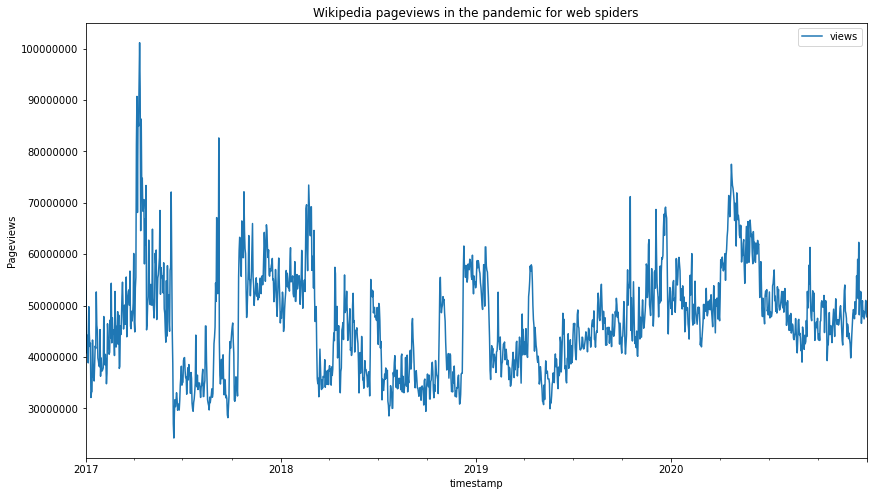

In [187]:
fig = df.plot(figsize=(14,8))
fig.set_ylabel("Pageviews")
fig.set_title("Wikipedia pageviews in the pandemic for web spiders")

fig.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.savefig("pageviews.pdf", dpi=300)

##### Question 3: The top 10 most viewed articles on the same day of your choice, in at least five different language versions of Wikipedia (only needs to be a simple table or list, not a visualization)

In [224]:
viewed_pages_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "all-access",
                    "year" : "20", #YYYYMMDDHH
                    "month" :  "03",
                    "day":"03"
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/nvgopal',
    'From': 'nvgopal@ucsd.com'
}

In [225]:
endpoint_top_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/top/{project}/{access}/{year}/{month}/{day}'

In [226]:
viewed_pages_params_pageviews = api_call(endpoint_top_pageviews, viewed_pages_params_pageviews)

In [227]:
viewed_pages_params_pageviews['items'][0:5]

[{'project': 'en.wikipedia',
  'access': 'all-access',
  'year': '2018',
  'month': '06',
  'day': '05',
  'articles': [{'article': 'Main_Page', 'views': 12203374, 'rank': 1},
   {'article': 'Kate_Spade', 'views': 2224883, 'rank': 2},
   {'article': 'Special:Search', 'views': 2125554, 'rank': 3},
   {'article': 'Andy_Spade', 'views': 733505, 'rank': 4},
   {'article': 'David_Spade', 'views': 423782, 'rank': 5},
   {'article': 'Rachel_Brosnahan', 'views': 359931, 'rank': 6},
   {'article': 'XHamster', 'views': 248006, 'rank': 7},
   {'article': 'David_A._Johnston', 'views': 147949, 'rank': 8},
   {'article': 'Dwight_Clark', 'views': 139392, 'rank': 9},
   {'article': '2018_FIFA_World_Cup', 'views': 131233, 'rank': 10},
   {'article': 'Deaths_in_2018', 'views': 115982, 'rank': 11},
   {'article': 'Avengers:_Infinity_War', 'views': 114310, 'rank': 12},
   {'article': 'Harry_R._Truman', 'views': 106015, 'rank': 13},
   {'article': 'Marco_Cecchinato', 'views': 99801, 'rank': 14},
   {'artic

In [228]:
df = pd.DataFrame(pd.DataFrame(viewed_pages_params_pageviews['items'])['articles'][0])
df

,article,views,rank
0,Main_Page,12203374,1
1,Kate_Spade,2224883,2
2,Special:Search,2125554,3
3,Andy_Spade,733505,4
4,David_Spade,423782,5
...,...,...,...
995,Sylvia_Plath,9154,996
996,Jim_Kenney,9150,997
997,List_of_Black_Mirror_episodes,9149,998
998,Rory_Kennedy,9147,999


In [229]:
df.head(10)['article']

0              Main_Page
1             Kate_Spade
2         Special:Search
3             Andy_Spade
4            David_Spade
5       Rachel_Brosnahan
6               XHamster
7      David_A._Johnston
8           Dwight_Clark
9    2018_FIFA_World_Cup
Name: article, dtype: object